In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
## target analysis

data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [5]:
## Missing value Analysis

data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
## Missing Value Imputation

for column_name in data.select_dtypes(include='float',exclude='object'):
    data.loc[:,column_name].fillna(data.loc[:,column_name].mean(),axis=0,inplace=True)

In [8]:
data.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [9]:
data['sex'].fillna(method ='ffill', inplace = True)
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

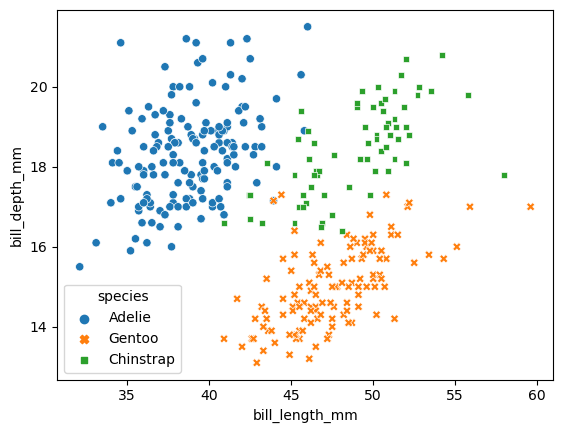

In [10]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',hue='species',data=data ,style='species')

## Observations:
- Bill_length_mm and bill_depth_mm are the differentiating factor for the species in pengunis
- bill_length_mm < 16 the speices belongs to Gentoo.
- bill_depth_mm < 40 the species belongs to Adelie
- bill_length_mm > 45 and bill_depth_mm > 16 the species belongs to Chinstrap

We can say that, to identify the penguins species we can use bill_length and bill_depth.


In [15]:
## Performing Label Encoding on sex and island colums

from sklearn.preprocessing import LabelEncoder

for col in data[['sex','island']]:
    data[col] = LabelEncoder().fit_transform(data[col])

In [16]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,0
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0


In [17]:
## Performing Feature Scaling on bill_length, bill_depth, flipper_length, body_mass columns

from sklearn.preprocessing import StandardScaler

for col in data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]:
    data[col] = StandardScaler().fit_transform(data[[col]])

In [18]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,-8.870812e-01,0.787743,-1.422488,-0.565789,1
1,Adelie,2,-8.134940e-01,0.126556,-1.065352,-0.503168,0
2,Adelie,2,-6.663195e-01,0.431719,-0.422507,-1.192003,0
3,Adelie,2,-1.307172e-15,0.000000,0.000000,0.000000,0
4,Adelie,2,-1.328605e+00,1.092905,-0.565361,-0.941517,0


In [21]:
## Seperate X and y

X = data.drop('species',axis=1)
y = data['species']

### PCA to derive new set of features from the available features

In [33]:
## Applying PCA on the data to reduce the number of features in the data

from sklearn.decomposition import PCA

PCA_TR = PCA(n_components=3)
X_pca = PCA_TR.fit_transform(X)

In [23]:
PCA_TR.explained_variance_ratio_

array([0.62557653, 0.19138465, 0.08540069])

- 'explained_variance_ratio_' gives percentage of weighted new features that impact label

In [24]:
PCA_TR.components_

array([[-0.28702173,  0.42706304, -0.39057771,  0.54921404,  0.52631458,
         0.06357387],
       [ 0.22442878,  0.5059585 ,  0.72698625,  0.04997141,  0.15418415,
         0.37263765],
       [ 0.0815501 ,  0.72944557, -0.24461252, -0.16470963, -0.51768431,
        -0.32603242]])

In [25]:
pd.DataFrame(PCA_TR.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
PC-1,-0.287022,0.427063,-0.390578,0.549214,0.526315,0.063574
PC-2,0.224429,0.505959,0.726986,0.049971,0.154184,0.372638
PC-3,0.081550,0.729446,-0.244613,-0.164710,-0.517684,-0.326032


In [38]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LRM = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
KNC = KNeighborsClassifier()
NBC = GaussianNB()
SVC = SVC()

In [27]:
SKF = StratifiedKFold(n_splits = 10, shuffle =True, random_state=10)

In [39]:
print(f'LogisticRegression : {round(cross_val_score(LRM,X_pca,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'DecisionTreeClassifier : {round(cross_val_score(DTC,X_pca,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'RandomForestClassifier : {round(cross_val_score(RFC,X_pca,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'KNeighborsClassifier : {round(cross_val_score(KNC,X_pca,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'GaussianNB : {round(cross_val_score(NBC,X_pca,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'Support Vector Machine : {round(cross_val_score(SVC,X_pca,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')

LogisticRegression : 99.13%
DecisionTreeClassifier : 97.96%
RandomForestClassifier : 98.55%
KNeighborsClassifier : 98.83%
GaussianNB : 98.25%
Support Vector Machine : 98.55%


## Observations:

- Logistic Regression best fits the data compared to other classification algorithms with 99.13% mean accuracy

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(LRM, X_train, y, cv = 10)

array([0.97142857, 1.        , 0.97142857, 1.        , 0.97058824,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [32]:
round(cross_val_score(LRM, X_train, y, cv = 10).mean() * 100, 2)

99.13